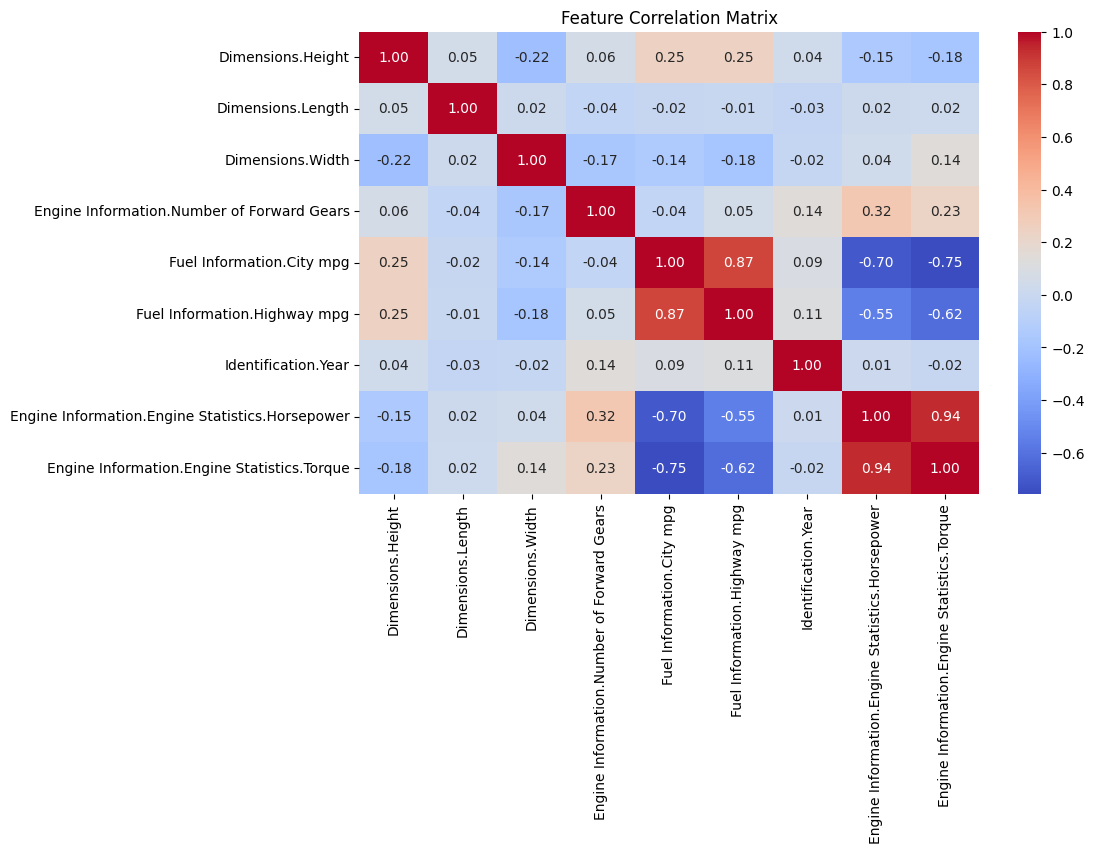

ValueError: could not convert string to float: 'Kia 2.0L 4 Cylinder 156 hp 144 ft-lbs'

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Step 1: Load the dataset
file_path = "cars.csv"
df = pd.read_csv(file_path)

# Step 2: Compute correlation matrix to select best features
correlation_matrix = df.select_dtypes(include=['number']).corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Matrix")
plt.show()

# Select relevant numerical features based on correlation
numerical_features = [
    "Dimensions.Height", "Dimensions.Length", "Dimensions.Width",
    "Engine Information.Number of Forward Gears",
    "Engine Information.Engine Statistics.Horsepower",
    "Engine Information.Engine Statistics.Torque"
]

# Step 3: Select categorical features
categorical_features = [
    "Engine Information.Driveline", "Engine Information.Transmission", "Fuel Information.Fuel Type"
]
target = "Fuel Information.City mpg"

# Step 4: Convert categorical features into numerical using one-hot encoding
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Step 5: Split data into train and test sets
X = df[numerical_features + list(df.columns.difference(numerical_features + [target]))]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train the multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 7: Make predictions and evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)
